In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def split_sub_image(img):
    # print(img.shape)
    h, w = img.shape
    w_cutoff = w // 2
    img_left = img[:,:w_cutoff]
    img_right = img[:,w_cutoff:]
    return img_left, img_right 

In [3]:
def cv2_show(caption, im):
    cv2.imshow(caption,im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
def imshow(img, gray):
    plt.axis('off')
    if gray :
        plt.imshow(img, cmap='gray')
    else :
        plt.imshow(img)

In [5]:
def intermean(hist, t, st, en):
    tot = np.sum(hist[st:en])
    prob = hist/tot
    w0 = np.sum(prob[st:t+1]) + 0.0000001
    #w1 = np.sum(prob[t+1:en])
    w1 = (1 - w0) +  + 0.0000001
    i0 = np.array([i for i in range(st,t+1)])
    i1 = np.array([i for i in range(t+1, en)])
    u0 = np.sum(i0*prob[st:t+1])/w0
    u1 = np.sum(i1*prob[t+1:en])/w1
    if u0 == 0.0:
        thr = u1
    elif u1 == 0.0:
        thr = u0
    else:
        thr = (u0+u1)/2
    return thr.astype(np.uint8)    

In [6]:
def hist_img_v0(f):
    m, n = f.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[f[i, j]]+=1
    return np.array(h, dtype='uint16')

In [7]:
def delete_noise(img):
    mask = np.ones([3, 3], dtype = 'float16') 
    mask = mask/9
    print(mask)
    f = img.copy().astype(np.float16)
    (m,n) = img.shape
    out = np.zeros_like(img, dtype = 'float16')

    for i in range(1,m-1):
        for j in range(1,n-1):
            tmp = 0
            for p in range(3):
                for q in range(3):
                    tmp = tmp + (mask[p,q]*f[i+p-1,j+q-1])
            out[i,j] = tmp   
    return out.astype(np.uint8)

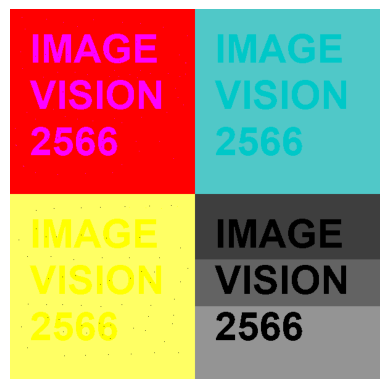

In [8]:
img = cv2.imread('./images/color.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imshow(img,0)

In [9]:
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

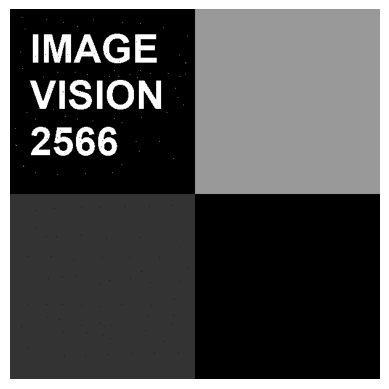

In [10]:
imshow(h,1)

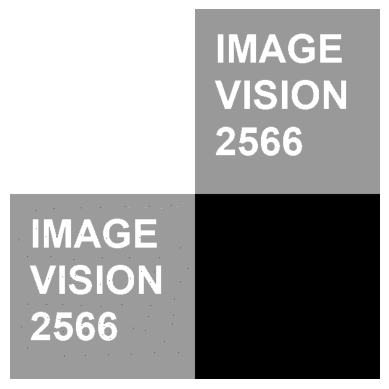

In [11]:
imshow(s,1)

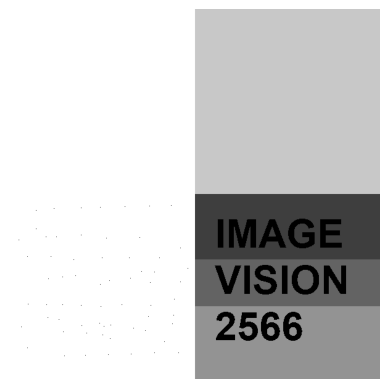

In [12]:
imshow(v,1)

## Split

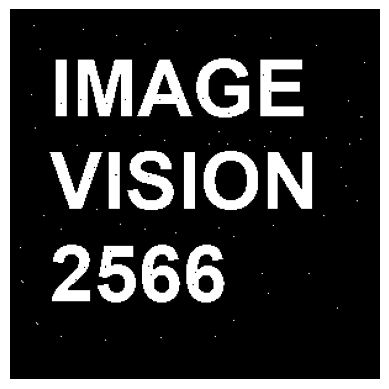

In [13]:
sub1, sub2 = split_sub_image(h)
resub1_1, sub2 = split_sub_image((sub1.transpose()))
resub1_1 = resub1_1.transpose()
imshow(resub1_1,1)

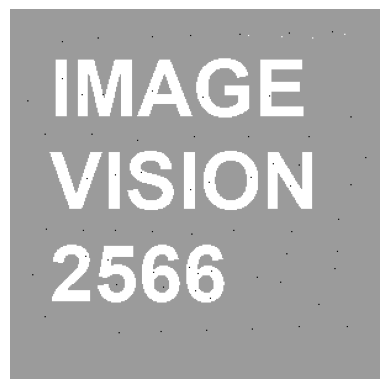

In [14]:
sub1, sub2 = split_sub_image(s)
sub1, resub1_2 = split_sub_image((sub1.transpose()))
resub1_2 = resub1_2.transpose()
imshow(resub1_2,1)

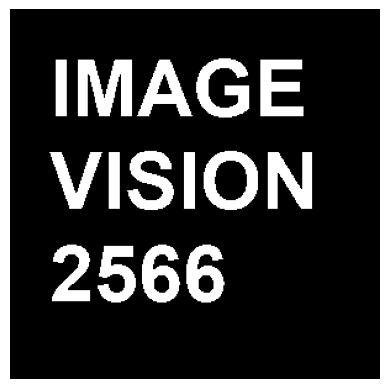

In [15]:
sub1, sub2 = split_sub_image(s)
resub2_1, sub2 = split_sub_image((sub2.transpose()))
resub2_1 = resub2_1.transpose()
imshow(resub2_1, 1)

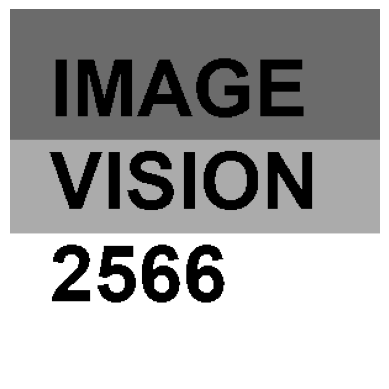

In [16]:
sub1, sub2 = split_sub_image(v)
sub1, resub2_2 = split_sub_image((sub2.transpose()))
resub2_2 = resub2_2.transpose()
imshow(resub2_2, 1)

### sub1_1

[[0.1111 0.1111 0.1111]
 [0.1111 0.1111 0.1111]
 [0.1111 0.1111 0.1111]]


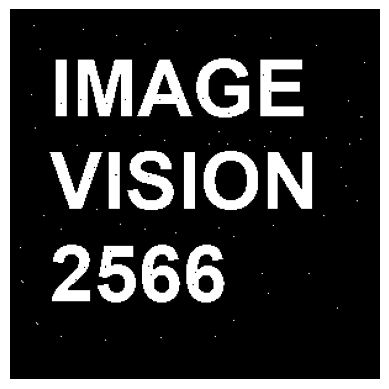

In [17]:
imshow(resub1_1, 1)
resub1_1 = delete_noise(resub1_1)
hist = hist_img_v0(resub1_1)

[128, 89, 78, 75, 75] 75
[38, 28, 25, 25] 25


/var/folders/3j/472my0ns69l6cvybqf8h17sm0000gn/T/ipykernel_26534/891832181.py:13: RuntimeWarning: overflow encountered in scalar subtract
  if abs(t1-t0) < tol :


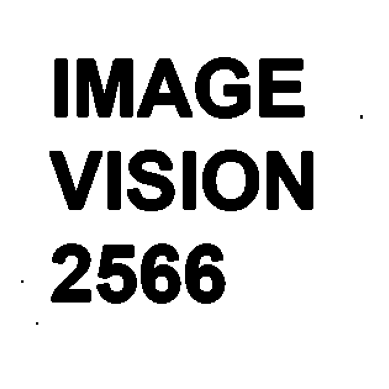

In [18]:
tol = 1
st, en = 0, 256
for t in range(2):
    flag = True
    T = []
    #t0 = random.randint(st, en)
    t0 = int((st+en)*0.5)
    T.append(t0)
    while(flag):
        t1 = intermean(hist[st:en], t0, st, en)
        T.append(t1)
        #print(t0, t1)
        if abs(t1-t0) < tol :
            flag = False
        else:
            t0 = t1
    thr = T[-1]
    en = thr+1
    print(T, thr)
result_sub11 = np.zeros_like(resub1_1)
result_sub11[resub1_1 <= thr ] = 255
result_sub11[resub1_1 > thr] = 0

imshow(result_sub11, 1)

### sub1_2

[[0.1111 0.1111 0.1111]
 [0.1111 0.1111 0.1111]
 [0.1111 0.1111 0.1111]]


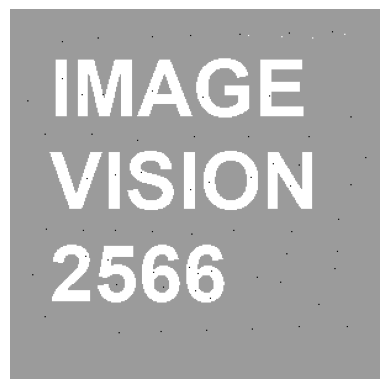

In [19]:
imshow(resub1_2, 1)
resub1_2 = delete_noise(resub1_2)
hist = hist_img_v0(resub1_2)

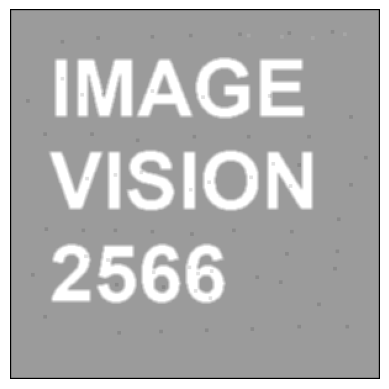

In [20]:
imshow(resub1_2, 1)

[128, 210, 198, 194, 194] 194


/var/folders/3j/472my0ns69l6cvybqf8h17sm0000gn/T/ipykernel_26534/3115747534.py:11: RuntimeWarning: overflow encountered in scalar subtract
  if abs(t1-t0) < tol :


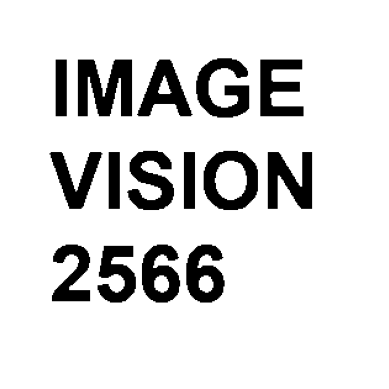

In [21]:
tol = 1
st, en = 0, 256
for t in range(1):
    flag = True
    T = []
    t0 = int((st+en)*0.5)
    T.append(t0)
    while(flag):
        t1 = intermean(hist, t0, st, en)
        T.append(t1)
        if abs(t1-t0) < tol :
            flag = False
        else:
            t0 = t1
    thr = T[-1]
    st = thr+1
    print(T, thr)

result_sub12 = np.zeros_like(resub1_2)
result_sub12[resub1_2 <= thr ] = 255
result_sub12[resub1_2 > thr] = 0
imshow(result_sub12, 1)

### sub2_1

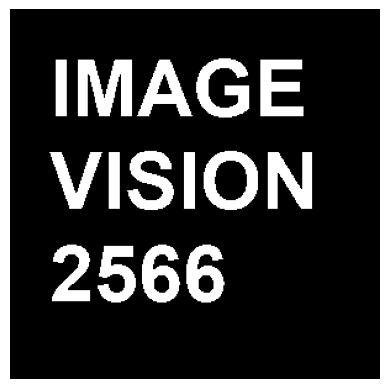

In [22]:
imshow(resub2_1, 1)
result_sub21 = np.zeros_like(resub2_1)
result_sub21[resub2_1 <= thr ] = 255
result_sub21[resub2_1 > thr] = 0

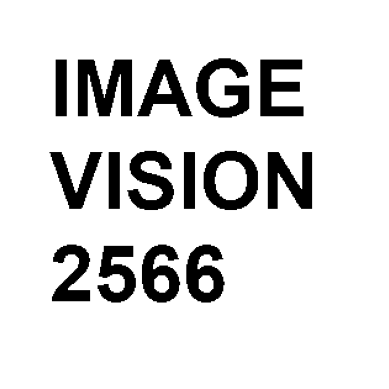

In [23]:
imshow(result_sub21, 1)

### sub2_2

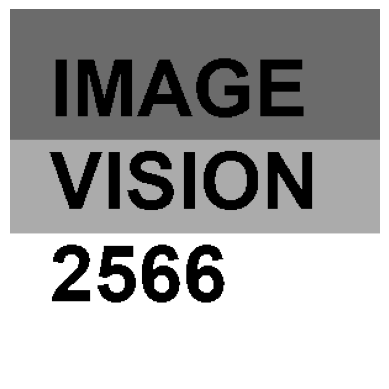

In [24]:
imshow(resub2_2, 1)

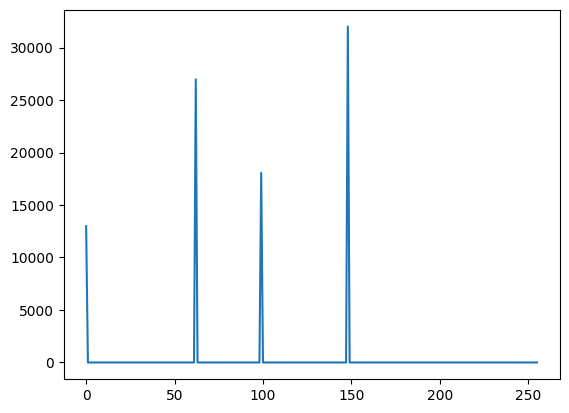

In [25]:
hist = hist_img_v0(resub2_2)
plt.plot(hist)

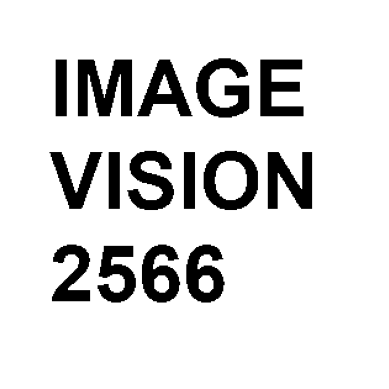

In [26]:
result_sub22 = np.zeros_like(resub2_2)
result_sub22[resub2_2 <= 50 ] = 0
result_sub22[resub2_2 > 50] = 255
imshow(result_sub22, 1)

## Merge

In [27]:
final_result = np.zeros_like(s, dtype='uint8')
h, w = s.shape
wc, hc = w // 2, h // 2
final_result[:hc,:wc] = result_sub11
final_result[hc:,:wc] = result_sub12
final_result[:hc,wc:] = result_sub21
final_result[hc:,wc:] = result_sub22

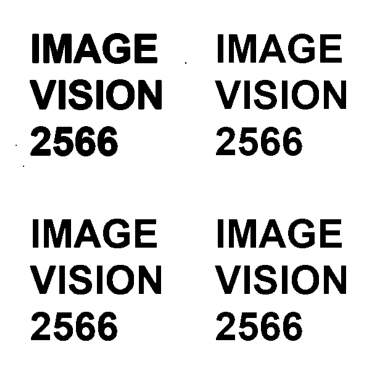

In [28]:
imshow(final_result, 1)
plt.savefig('./outs/hw4_HSV.png')